# **IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.offline import init_notebook_mode
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go

In [2]:
pd.set_option('display.max_columns', None)
init_notebook_mode(connected = True)

# **DATA LOAD**

In [3]:
df_loss_p = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_personnel.csv')
df_loss_e = pd.read_csv('/kaggle/input/2022-ukraine-russian-war/russia_losses_equipment.csv')

In [4]:
df_loss_p.head()

,date,day,personnel,personnel*,POW
0,2024-08-11,900,590920,about,NaN
1,2024-08-10,899,589700,about,NaN
2,2024-08-09,898,588540,about,NaN
3,2024-08-08,897,587510,about,NaN
4,2024-08-07,896,586370,about,NaN


In [5]:
df_loss_e.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2024-08-11,900,366,328,8447,16363,16663,1143,NaN,NaN,13399,28,918,2800.0,NaN,NaN,22524.0,2425.0,1.0
1,2024-08-10,899,366,327,8441,16350,16605,1143,NaN,NaN,13372,28,918,2789.0,NaN,NaN,22453.0,2425.0,1.0
2,2024-08-09,898,366,327,8434,16341,16536,1142,NaN,NaN,13325,28,916,2769.0,NaN,NaN,22371.0,2424.0,1.0
3,2024-08-08,897,366,327,8431,16332,16487,1142,NaN,NaN,13293,28,914,2767.0,NaN,NaN,22285.0,2424.0,1.0
4,2024-08-07,896,365,326,8429,16323,16451,1138,NaN,NaN,13212,28,910,2759.0,NaN,NaN,22226.0,2421.0,1.0


# **DATA INFORMATION**

In [6]:
df_loss_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        899 non-null    object 
 1   day         899 non-null    int64  
 2   personnel   899 non-null    int64  
 3   personnel*  899 non-null    object 
 4   POW         62 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 35.2+ KB


In [7]:
df_loss_e.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899 entries, 0 to 898
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date                       899 non-null    object 
 1   day                        899 non-null    int64  
 2   aircraft                   899 non-null    int64  
 3   helicopter                 899 non-null    int64  
 4   tank                       899 non-null    int64  
 5   APC                        899 non-null    int64  
 6   field artillery            899 non-null    int64  
 7   MRL                        899 non-null    int64  
 8   military auto              65 non-null     float64
 9   fuel tank                  65 non-null     float64
 10  drone                      899 non-null    int64  
 11  naval ship                 899 non-null    int64  
 12  anti-aircraft warfare      899 non-null    int64  
 13  special equipment          880 non-null    float64

# **EXPLORATORY DATA ANALYSIS**
**Drop Null Values**

In [8]:
df_loss_p.isnull().sum()

date            0
day             0
personnel       0
personnel*      0
POW           837
dtype: int64

**POW column has 711 NAN Values**

**We have to drop this column**

In [9]:
df_loss_p.drop(['POW'], axis = 1, inplace = True)

In [10]:
df_loss_p.head()

,date,day,personnel,personnel*
0,2024-08-11,900,590920,about
1,2024-08-10,899,589700,about
2,2024-08-09,898,588540,about
3,2024-08-08,897,587510,about
4,2024-08-07,896,586370,about


In [11]:
df_loss_p.describe()

,day,personnel
count,899.000000,899.000000
mean,451.000000,225364.288098
std,259.663243,170147.702356
min,2.000000,2800.000000
25%,226.500000,61870.000000
50%,451.000000,202430.000000
75%,675.500000,358750.000000
max,900.000000,590920.000000


In [12]:
df_loss_e.isnull().sum()

date                           0
day                            0
aircraft                       0
helicopter                     0
tank                           0
APC                            0
field artillery                0
MRL                            0
military auto                834
fuel tank                    834
drone                          0
naval ship                     0
anti-aircraft warfare          0
special equipment             19
mobile SRBM system           863
greatest losses direction    696
vehicles and fuel tanks       65
cruise missiles               65
submarines                   566
dtype: int64

In [13]:
df_loss_e.describe()

,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,vehicles and fuel tanks,cruise missiles,submarines
count,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,899.000000,65.000000,65.000000,899.000000,899.000000,899.000000,880.000000,36.000000,834.000000,834.000000,333.0
mean,451.000000,287.361513,270.884316,4121.962180,8077.830923,5212.823137,617.189099,1047.507692,69.323077,4147.896552,18.548387,400.751947,791.315909,3.944444,8486.225420,1172.230216,1.0
std,259.663243,66.015550,66.870749,2229.886181,4054.419928,4582.020743,327.078435,466.162060,7.545917,3618.439440,5.756825,265.167950,788.370720,0.333333,5375.833772,729.115340,0.0
min,2.000000,10.000000,7.000000,80.000000,516.000000,49.000000,4.000000,100.000000,60.000000,0.000000,2.000000,0.000000,10.000000,2.000000,1796.000000,84.000000,1.0
25%,226.500000,266.000000,233.500000,2469.000000,5102.000000,1457.000000,344.500000,600.000000,60.000000,1073.000000,15.000000,178.500000,147.750000,4.000000,4404.500000,531.000000,1.0
50%,451.000000,308.000000,294.000000,3781.000000,7382.000000,3229.000000,564.000000,1178.000000,73.000000,2801.000000,18.000000,325.000000,453.500000,4.000000,6672.500000,1214.000000,1.0
75%,675.500000,329.000000,324.000000,5973.000000,11061.500000,8449.000000,941.000000,1437.000000,76.000000,6572.500000,23.000000,622.000000,1306.250000,4.000000,11722.750000,1815.750000,1.0
max,900.000000,366.000000,328.000000,8447.000000,16363.000000,16663.000000,1143.000000,1701.000000,76.000000,13399.000000,28.000000,918.000000,2800.000000,4.000000,22524.000000,2425.000000,1.0


In [14]:
# Graph about Russia Air Equipment losses.
fig=px.line(df_loss_e,x='date',y=['drone','aircraft','helicopter'],template='plotly',title='Russia Air Equipment losses')
fig.show()

names = ['drone', 'aircraft', 'helicopter']
values = [df_loss_e['drone'].max(), df_loss_e['aircraft'].max(), df_loss_e['helicopter'].max()]
fig = px.pie(names=names, values=values, hole=0.4, template='plotly')
fig.update_layout(title_x=0.5, legend=dict(orientation='h', yanchor='bottom', y=1.02, xanchor='right', x=1))



**Drones are the ones with the most losses. and aircraft and helicopter have similar values.**

**Why are drone losses increasing??**
> Ukraine has seen significant benefits from the use of drones, and Russia has also responded by utilizing drones.
Over tims, as more cost-effective frones were deployed, it's expected that losses have also incresed.

In [15]:
# Graph about Russia Fuel Equipment losses.
fig = px.line(df_loss_e, x = 'date', y = ['vehicles and fuel tanks', 'tank', 'fuel tank'], template = 'plotly', title = 'Russia Fuel Equipment losses')
fig.show()

names = ['vehicles and fuel tanks', 'tank', 'fuel tank']
values = [df_loss_e['vehicles and fuel tanks'].max(), df_loss_e['tank'].max(), df_loss_e['fuel tank'].max()]
fig = px.pie(names = names, values = values, hole = .7, template = 'plotly')
fig.update_layout(title_x = 0.5, legend = dict(orientation = 'h', yanchor = 'bottom', y = 1.02, xanchor = 'right', x = 1))

**Russia loss vehicles and fuel tanks about 67.8% and 31.8% tank and 0.342% fuel tank.**

**Fuel Tank - has not been tracked since 2022-05-01. joined with Military Auto into Vehicles and Fuel Tanks**

In [16]:
fig = px.line(df_loss_e, x = 'date', y = ['APC' , 'military auto', 'field artillery', 'MRL', 'cruise missiles'], template = 'plotly', title = 'Russia Military Equipment losses')
fig.show()

names = ['APC', 'military auto', 'field artillery', 'MRL', 'cruise missiles']
values = [df_loss_e['APC'].max(), df_loss_e['military auto'].max(), df_loss_e['field artillery'].max(), df_loss_e['MRL'].max(), df_loss_e['cruise missiles'].max()]
fig = px.pie(names = names, values = values, template = 'plotly', hole = .7)
fig.update_layout(title_x = 0.5, legend = dict(orientation = 'h', yanchor = 'bottom', xanchor = 'right', y = 1.02, x = 1))

**APC - field artillery - cruise missalies - military auto - MRL**

**Military Auto - has not been tracked since 2022-05-01. joined with Fuel Tank into Vehicles and Fuel Tanks**

**Mobile SRBM System - has not been tracked since 2022-05-01. joined into Cruise Missiles**

In [17]:
fig = px.line(df_loss_e, x = 'date', y = ['special equipment'], template = 'plotly', title = 'Special Equipment losses in Russia')
fig.update_traces(showlegend = False)
fig.show()

In [18]:
fig = px.line(df_loss_e, x = 'date', y = ['naval ship', 'submarines'], template = 'plotly', title = 'Naval Ship and Submarines Equipment losses in Russia')
fig.update_traces(showlegend = False)
fig.show()

# **ALL EQUIPMENTS LOSSES IN RUSSIA**

In [19]:
fig = go.Figure()
from plotly.subplots import make_subplots
fig = make_subplots(rows = 3, cols = 5, subplot_titles = ('aircraft', 'helicopter', 'tank', 'APC', 'field artillery', 'MRL', 'military auto', 'fuel tank', 'drone', 'naval ship', 'aircraft warfare', 'special equipment', 'vehicles&fuel tanks', 'cruise missiles', 'mobile SRBM system'))
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['aircraft'],name = 'aircraft'),row = 1,col = 1)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['helicopter'],name = 'helicopter'),row = 1,col = 2)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['tank'],name = 'tank'),row = 1,col = 3)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['APC'],name = 'APC'),row = 1,col = 4)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['field artillery'],name = 'field artillery'),row = 1,col = 5)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['MRL'],name = 'MRL'),row = 2,col=1)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['military auto'],name = 'military auto'),row = 2,col = 2)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['fuel tank'],name =' fuel tank'),row = 2,col = 3)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['drone'],name = 'drone'),row = 2,col = 4)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['naval ship'],name = 'naval ship'),row = 2,col = 5)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['anti-aircraft warfare'],name = 'anti-aircraft warfare'),row = 3,col = 1)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['special equipment'],name = 'special equipment'),row = 3,col = 2)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['vehicles and fuel tanks'],name = 'vehicles and fuel tanks'),row = 3,col = 3)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['cruise missiles'],name = 'cruise missiles'),row = 3,col = 4)
fig.add_trace(go.Scatter(x = df_loss_e['date'],y = df_loss_e['mobile SRBM system'],name = 'mobile SRBM system'),row = 3,col = 5)
fig.update_layout(showlegend = False)
fig.update_layout(height = 1000, width = 1200, title_text = 'Total Equipment Losses in Russia')
fig.update_layout(template = 'plotly', title_x = 0.5)

**Now we check which cities losses more equipment.**

**Use greatest losses direction columns.**

In [20]:
px.bar(df_loss_e.groupby(['greatest losses direction'], as_index = False)[['tank']].count().sort_values(by = 'tank', ascending = False).reset_index(drop = True).head(15), x = 'greatest losses direction', y = 'tank', color = 'greatest losses direction', template = 'plotly', text = 'tank', labels = {'tank':'count'},title = 'Which cities more losses')

***The main reason for the most significant damage in Donetsk.(maybe)***

>**According to the New York Times, it is estimated that Ukraine has deployed more than a third of its entire military to Donbas for combat against pro-Russian separatists and Russian forces.
If the Russian military captures the Donbas region, it would create a land corridor connecting the already forcibly annexed southern part of Ukraine, the Crimean Peninsula, and Donbas with Russia.
The reason Russia has been so desperate to seize the strategic stronghold of Mariupol, located between the Crimean Peninsula and the Donbas region, since the outbreak of the war is for this very purpose.
Additionally, it is reported that the Donbas and other eastern regions of Ukraine are rich in resources such as coal and rare minerals.
There are concerns that Ukraine could become a divided country if it succumbs to Western pressure to stop the war and enters into a ceasefire by handing over the region connecting Crimea to Donbas to the Russian military.
If Donbas falls into Russian hands, the majority of central Ukraine could become vulnerable to potential future attacks by the Russian military.**


**Source: 연합NEWS(REPUBLIC OF KOREA).**

***The main reason for damage in Bakhmut.(maybe)***

>**Initially, the strategic value of Bakhmut was not considered significant. However, as the front lines increasingly concentrated to the south, it became one of the main battlegrounds. The fact that the road network starting from Bakhmut connects to Kramatorsk and Sloviansk has become an important factor for both sides, as controlling this area would facilitate an invasion of the entire Donetsk region.**

**Source: wikipedia**


**and we check about personnel losses.**


# **PERSONNEL LOSSES**

In [21]:
fig = px.line(df_loss_p, x = 'date', y = 'personnel', title = 'Personnel Losses in Russia', template = 'plotly')
fig.update_traces(marker = dict(size = 4))
fig.show()

**Personnel Losses are steadily increasing. I hope the traged of these two contries ends quickly.**

**추가 작업**

**시계열 데이터니까 예측 분석 모델링을 사용할 수 있지 않을까?**

In [22]:
c_loss_e = df_loss_e.copy()
c_loss_p = df_loss_p.copy()

In [23]:
c_loss_p.head()

,date,day,personnel,personnel*
0,2024-08-11,900,590920,about
1,2024-08-10,899,589700,about
2,2024-08-09,898,588540,about
3,2024-08-08,897,587510,about
4,2024-08-07,896,586370,about


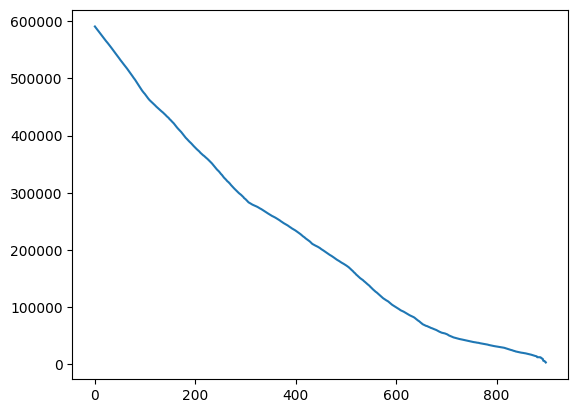

In [24]:
plt.plot(c_loss_p['personnel'])
plt.show()

# time vlaues move index

In [25]:
c_loss_p.index = c_loss_p['date']
c_loss_p.head()

,date,day,personnel,personnel*
date,,,,
2024-08-11,2024-08-11,900,590920,about
2024-08-10,2024-08-10,899,589700,about
2024-08-09,2024-08-09,898,588540,about
2024-08-08,2024-08-08,897,587510,about
2024-08-07,2024-08-07,896,586370,about


In [26]:
# drop unnessary columns
# Ascending date columns
c_loss_p.drop(['date', 'day', 'personnel*'], axis = 1, inplace = True)
c_loss_p = c_loss_p.sort_values(by='date', ascending=True)
c_loss_p.head()

,personnel
date,
2022-02-25,2800
2022-02-26,4300
2022-02-27,4500
2022-02-28,5300
2022-03-01,5710


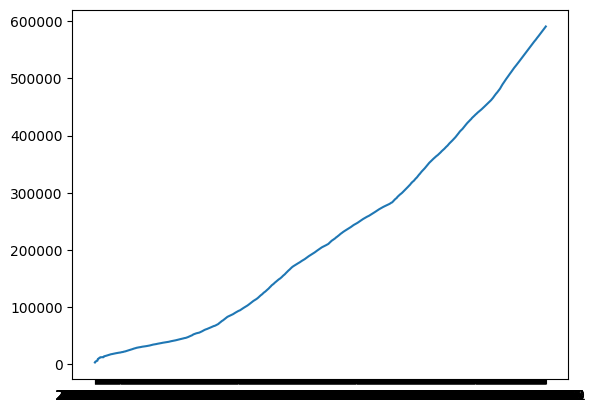

In [27]:
plt.plot(c_loss_p['personnel'])
plt.show()

In [28]:
# array convert
c_loss_p = c_loss_p.values
# c_loss_p

In [29]:
c_loss_p.dtype

dtype('int64')

In [30]:
# int > float
c_loss_p = c_loss_p.astype('float32')
c_loss_p[0:2]

array([[2800.],
       [4300.]], dtype=float32)

In [31]:
def split_data(dataframe, test_size):
    pos = int(round(len(dataframe) * (1 - test_size)))
    train = dataframe[:pos]
    test = dataframe[pos:]
    return train, test, pos

In [32]:
train, test, pos = split_data(c_loss_p, 0.20)

In [33]:
print(train.shape, test.shape, pos)

(719, 1) (180, 1) 719


In [34]:
# 시계열 데이터
# MinMaxScaler : data 의 특정 범위로 스케일링 > 범위 조정 > 모든 특성이 동일한 스케일을 갖도록 해줌
from sklearn.preprocessing import MinMaxScaler
# mean_squared_error : 예측값과 실제값 사이의 평균 제곱 오차를 계산 > 회귀에 많이 쓰임
from sklearn.metrics import mean_squared_error

# Sequential : layer를 선형으로 쌓아서 신경망을 만듬. 각 레이어는 이전의 레이어의 출력을 입력으로 받음
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

2024-08-14 04:12:06.252162: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-14 04:12:06.252347: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-14 04:12:06.407816: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [35]:
scaler_train = MinMaxScaler(feature_range = (0, 1))
train = scaler_train.fit_transform(train)
scaler_test = MinMaxScaler(feature_range = (0, 1))
test = scaler_test.fit_transform(test)

In [36]:
train[0:5]

array([[0.        ],
       [0.0038044 ],
       [0.00431166],
       [0.00634067],
       [0.00738054]], dtype=float32)

In [37]:
test[0:5]

array([[0.        ],
       [0.00492787],
       [0.01120448],
       [0.01665115],
       [0.02225327]], dtype=float32)

In [38]:
def create_features(data, lookback):
    X, Y = [], []
    for i in range(lookback, len(data)):
        X.append(data[i-lookback:i, 0])
        Y.append(data[i, 0])
    return np.array(X), np.array(Y)

In [39]:
# 100 days
lookback = 120

In [40]:
print(len(train))
print(len(test))

719
180


In [41]:
X_train, y_train = create_features(train, lookback)

In [42]:
X_test, y_test = create_features(test, lookback)

In [43]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((599, 120), (599,), (60, 120), (60,))

In [44]:
X_train[0:2]

array([[0.        , 0.0038044 , 0.00431166, 0.00634067, 0.00738054,
        0.00771026, 0.01572486, 0.01614588, 0.01826113, 0.0207974 ,
        0.0207974 , 0.02333367, 0.02333367, 0.02333367, 0.02333367,
        0.02333367, 0.02333367, 0.02333367, 0.02713807, 0.02789895,
        0.02840621, 0.02891346, 0.02942071, 0.0301816 , 0.03094248,
        0.03170336, 0.03246424, 0.03297149, 0.03373237, 0.03449325,
        0.03500051, 0.03601502, 0.03652227, 0.03677589, 0.03728315,
        0.0377904 , 0.03804403, 0.03855128, 0.03931217, 0.03981942,
        0.04007304, 0.04083392, 0.04108755, 0.04134118, 0.04184843,
        0.04235569, 0.04260931, 0.04311657, 0.04337019, 0.04362382,
        0.04387745, 0.0443847 , 0.04514558, 0.04565284, 0.04590646,
        0.04616009, 0.04666734, 0.04768185, 0.0481891 , 0.04844273,
        0.04894998, 0.04971087, 0.05072537, 0.05123262, 0.05173988,
        0.05250076, 0.05326164, 0.05427615, 0.05503703, 0.05554428,
        0.05605154, 0.05655879, 0.0575733 , 0.05

In [45]:
y_test[0:2]

array([0.6466956 , 0.65317965], dtype=float32)

In [46]:
X_train=np.reshape(X_train,(X_train.shape[0],1,X_train.shape[1]))

In [47]:
X_test=np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [48]:
y_train = y_train.reshape(-1, 1)

In [49]:
y_test = y_test.reshape(-1, 1)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((599, 1, 120), (599, 1), (60, 1, 120), (60, 1))

In [51]:
model=Sequential()
model.add(LSTM(units=50,
              activation="relu",
              input_shape=(X_train.shape[1],lookback)))
model.add(Dropout(0.2))
model.add(Dense(1))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        34,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,251 (133.79 KB)

 Trainable params: 34,251 (133.79 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss="mean_squared_error",optimizer="adam")

In [53]:
callbacks=[EarlyStopping(monitor="val_loss",patience=3,verbose=1,mode="min"),
          ModelCheckpoint(filepath="mymodel.keras",monitor="val_loss",mode="min",
                         save_best_only=True,save_weights_only=False,verbose=1)]

history = model.fit(x=X_train,
                    y=y_train,
                    epochs=100,
                    batch_size=20,
                    validation_data=(X_test,y_test),
                    callbacks=callbacks,
                    shuffle=False)

Epoch 1/100
22/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0088
Epoch 1: val_loss improved from inf to 0.12810, saving model to mymodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0108 - val_loss: 0.1281
Epoch 2/100
25/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0121     
Epoch 2: val_loss improved from 0.12810 to 0.07360, saving model to mymodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0138 - val_loss: 0.0736
Epoch 3/100
24/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0017     
Epoch 3: val_loss improved from 0.07360 to 0.04298, saving model to mymodel.keras
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0025 - val_loss: 0.0430
Epoch 4/100
23/30 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0023 
Epoch 4: val_loss did not improve from 0.04298
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029 - val_loss: 0.0471
Epoch 5/100
21/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012     
Epoch 5: val_loss did not improve from 0.04298
30/30 ━━━━━━━━━━━━━━━━━━━

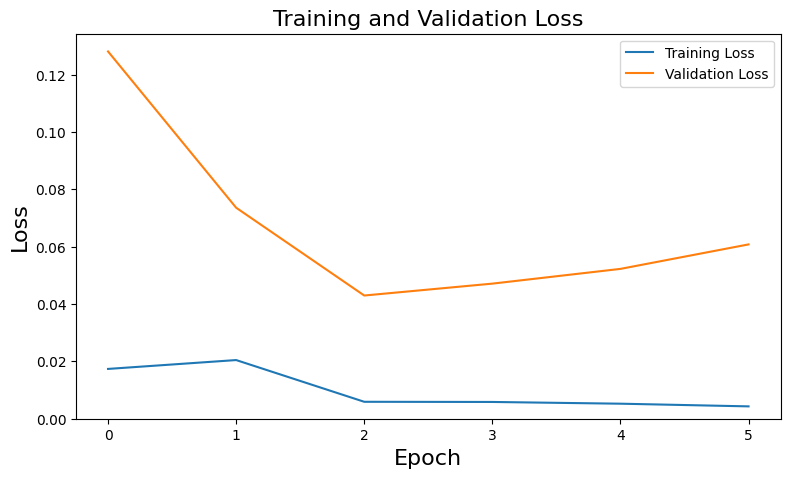

In [54]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)
plt.show()

In [55]:
loss=model.evaluate(X_test,y_test,batch_size=20)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0622 


In [56]:
print("\nTest loss:%.1f%%"%(100.0*loss))


Test loss:6.1%


In [57]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [58]:
train_predict=scaler_train.inverse_transform(train_predict)
test_predict=scaler_test.inverse_transform(test_predict)

y_train=scaler_train.inverse_transform(y_train)
y_test=scaler_test.inverse_transform(y_test)

train_rmse=np.sqrt(mean_squared_error(y_train,train_predict))
test_rmse=np.sqrt(mean_squared_error(y_test,test_predict,))

In [59]:
print(f"Train RMSE:{train_rmse}")
print(f"Test RMSE:{test_rmse}")

Train RMSE:7522.79541015625
Test RMSE:47535.57421875


In [60]:
train_prediction_data = c_loss_p[lookback : pos]

In [61]:
# train_prediction_data['Predicted'] = train_predict
# train_prediction_data.head()

type(train_prediction_data)

numpy.ndarray

In [62]:
print(len(train_prediction_data))
print(len(train_predict))

599
599


In [63]:
train_prediction_data = pd.DataFrame(train_prediction_data)
type(train_prediction_data)

pandas.core.frame.DataFrame

In [64]:
train_prediction_data['Predicted'] = train_predict
train_prediction_data.head()

,0,Predicted
0,34700.0,41188.636719
1,34850.0,41551.554688
2,35000.0,41927.082031
3,35250.0,42222.304688
4,35450.0,42541.757812


In [65]:
test_prediction_data = c_loss_p[pos + lookback:]
test_prediction_data = pd.DataFrame(test_prediction_data)
test_prediction_data['Predicted'] = test_predict
test_prediction_data.head()

,0,Predicted
0,522810.0,473396.25000
1,524060.0,474572.46875
2,525150.0,475855.28125
3,526310.0,477117.87500
4,527390.0,478334.12500


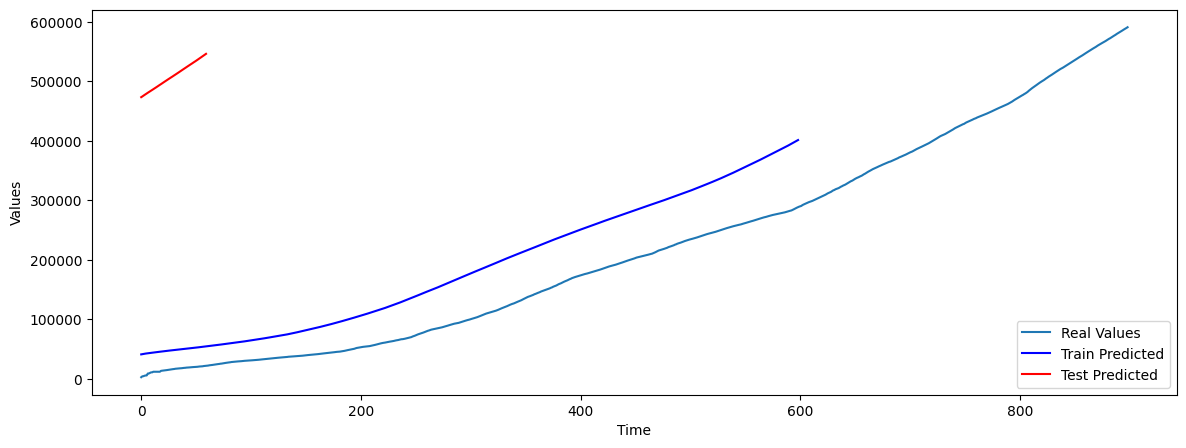

In [66]:
plt.figure(figsize=(14,5))
plt.plot(c_loss_p,label="Real Values")
plt.plot(train_prediction_data["Predicted"],color="blue",label="Train Predicted")
plt.plot(test_prediction_data["Predicted"],color="red",label="Test Predicted")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.show()